In [60]:
# Importing necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Connecting the dataset
earmarks = pd.read_csv('FY2022-Congressionally-Directed-Spending-BPC.csv')
print(len(earmarks))
# Removes unusable "amount" data
for i in earmarks.index[earmarks["amount"]=='?'].tolist():
    earmarks = earmarks.drop(i)

# Quick look at the dataset
print(len(earmarks))
print(earmarks.info)
print(earmarks.head())

# Some unnecessary warnings pop-up on some of the barplots, this line keeps them from showing up and being distracting
pd.options.mode.chained_assignment = None


4975
4974
<bound method DataFrame.info of                                                category  \
0     Agriculture, Rural Development, Food and Drug ...   
1     Agriculture, Rural Development, Food and Drug ...   
2     Agriculture, Rural Development, Food and Drug ...   
3     Agriculture, Rural Development, Food and Drug ...   
4     Agriculture, Rural Development, Food and Drug ...   
...                                                 ...   
4970  Transportation, and Housing and Urban Developm...   
4971  Transportation, and Housing and Urban Developm...   
4972  Transportation, and Housing and Urban Developm...   
4973  Transportation, and Housing and Urban Developm...   
4974  Transportation, and Housing and Urban Developm...   

                                          agency  \
0     Animal and Plant Health Inspection Service   
1     Animal and Plant Health Inspection Service   
2     Animal and Plant Health Inspection Service   
3     Animal and Plant Health Inspection 

In [61]:
# Sectioning off the dataset by party of the first requestor
dem_earmarks = earmarks[earmarks['requestor_one_party']=='Democrat']
print(dem_earmarks.head())
rep_earmarks = earmarks[earmarks['requestor_one_party']=='Republican']
ind_earmarks = earmarks[earmarks['requestor_one_party']=='Independent']

                                            category  \
2  Agriculture, Rural Development, Food and Drug ...   
3  Agriculture, Rural Development, Food and Drug ...   
4  Agriculture, Rural Development, Food and Drug ...   
5  Agriculture, Rural Development, Food and Drug ...   
6  Agriculture, Rural Development, Food and Drug ...   

                                       agency    account  \
2  Animal and Plant Health Inspection Service  APHIS S&E   
3  Animal and Plant Health Inspection Service  APHIS S&E   
4  Animal and Plant Health Inspection Service  APHIS S&E   
5  Animal and Plant Health Inspection Service  APHIS S&E   
6  Animal and Plant Health Inspection Service  APHIS S&E   

                                          project  \
2                   Invasive Species Surveillance   
3                       Kula Agricultural Fencing   
4               O?Hare Federal Inspection Station   
5                                Horse Management   
6  New York Dairy Farms Antimicrobial

### Swing states alone are being studied because they are most likely to show an interesting comparison between the spending by different parties.

In [62]:
# Creating useful lists for holding values needed for creating the coming for loops and plots
parties = [dem_earmarks, rep_earmarks, ind_earmarks]
swing_states = ["CO", "FL", "IA", "MI", "NC", "NH", "NV", "OH", "PA", "VI", "WI"]

In [63]:
# Making a function that can be used for each of the states in the swing states list

def state_plt(state_index):
    for i in range(len(parties)):
        # Index was used instead of direct dataframe so that the party can be stated later on above the outputted plots
        party = parties[i]
        str_party = ["Democrat", "Republican", "Independent"][i]

        # Sorting party dataframe by state and category of spending
        party_by_state = party[party.state ==swing_states[state_index]]
        party_by_state['amount'] = party_by_state['amount'].apply(pd.to_numeric)
        grouped = party_by_state.groupby(['category']).sum()

        # Fits the size of the chart to the amount of bars there will be in the chart
        size = 0
        for i in range(len(grouped)):
            size+=3

        # Creates the plot
        if size == 0:
            pass
        else:
            print("State:", swing_states[state_index])
            print("Party Dataframe:", str_party)
            f,ax = plt.subplots(1, 1, figsize=(size, 10))

            # Plots bars on subplot created above
            ax.ticklabel_format(useOffset=False, style = "plain")
            sns.barplot(x= grouped.index, y=grouped.amount, ax=ax)
            ax.set_xticks(list(range(len(grouped.index.unique()))))
            ax.set_xticklabels(list(grouped.index.unique()), rotation=90, fontsize = 15)
            ax.set_ylabel('Amount Spent in Dollars', fontsize = 15)
            ax.set_xlabel('Category')
            plt.show()

State: CO
Party Dataframe: Democrat


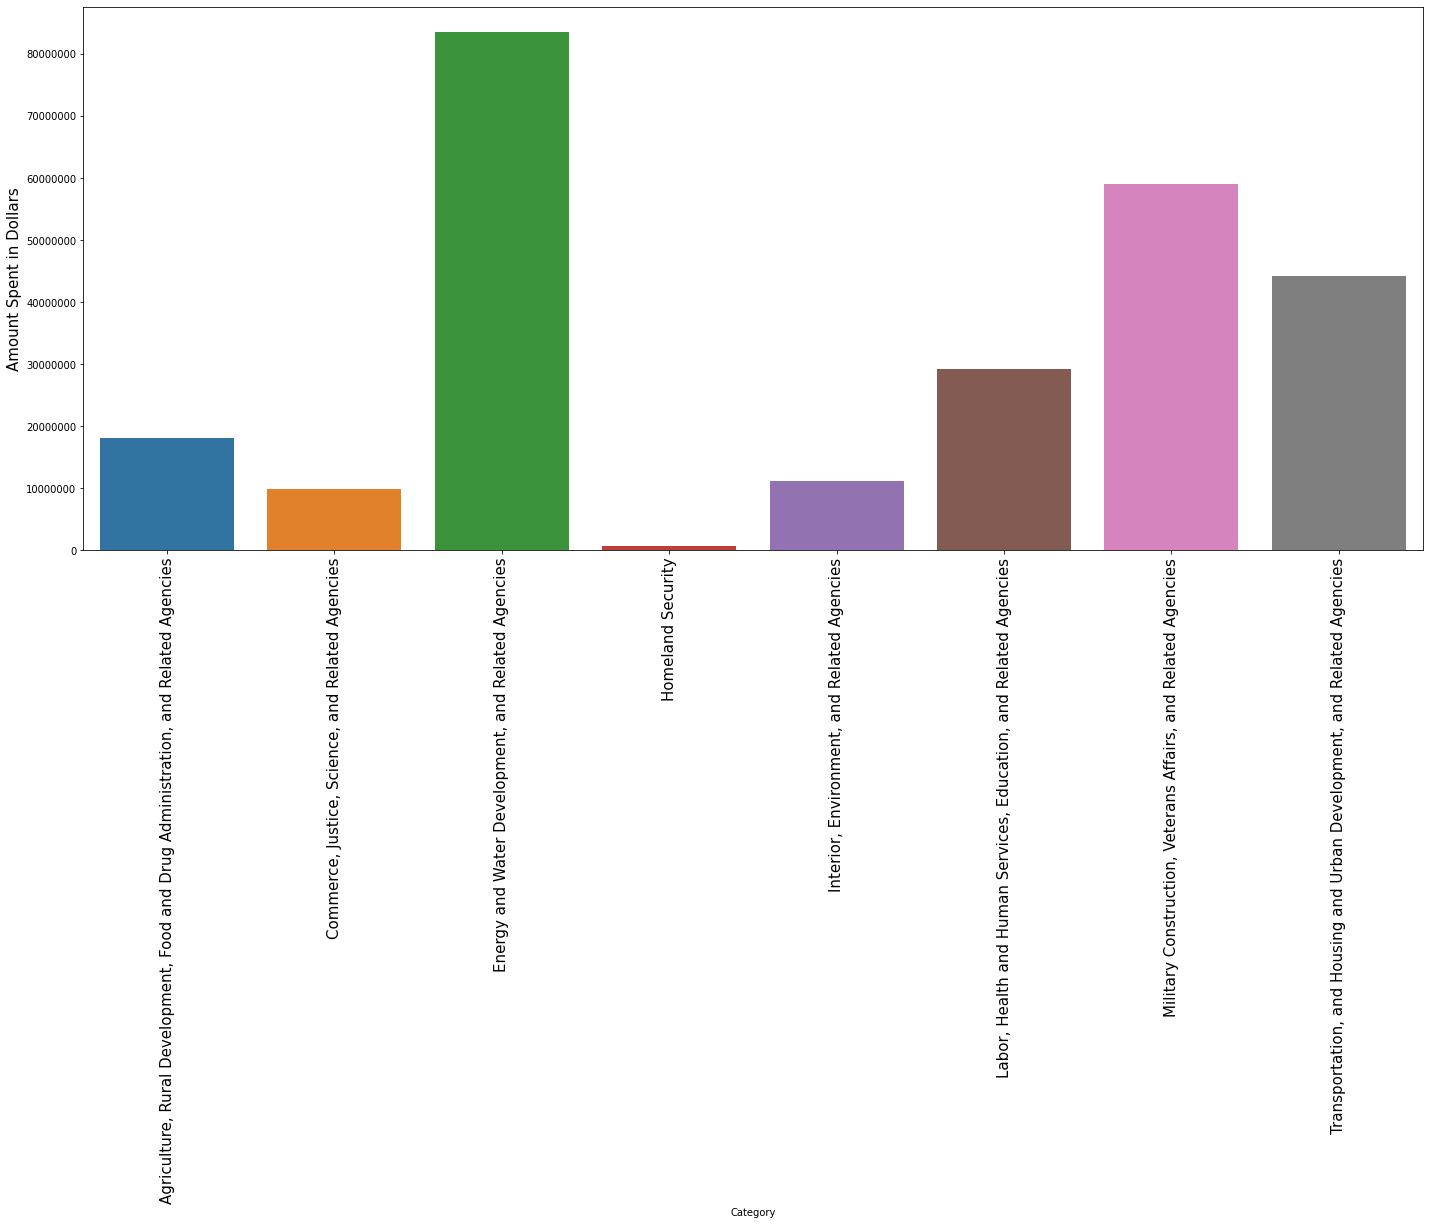

In [64]:
# Creates plots for Colorado

state_plt(0)

State: FL
Party Dataframe: Democrat


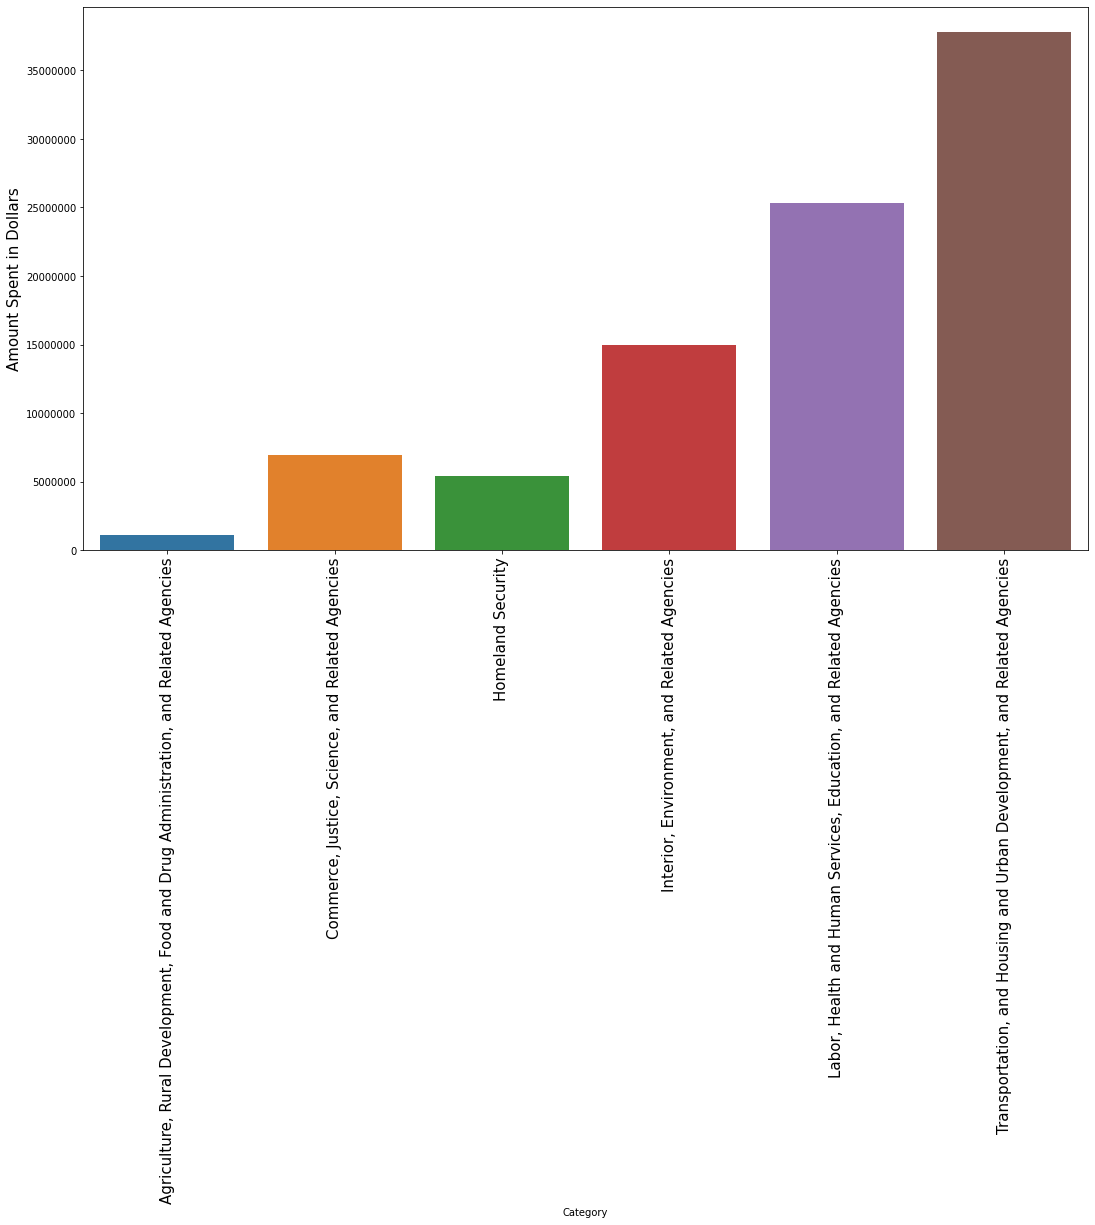

State: FL
Party Dataframe: Republican


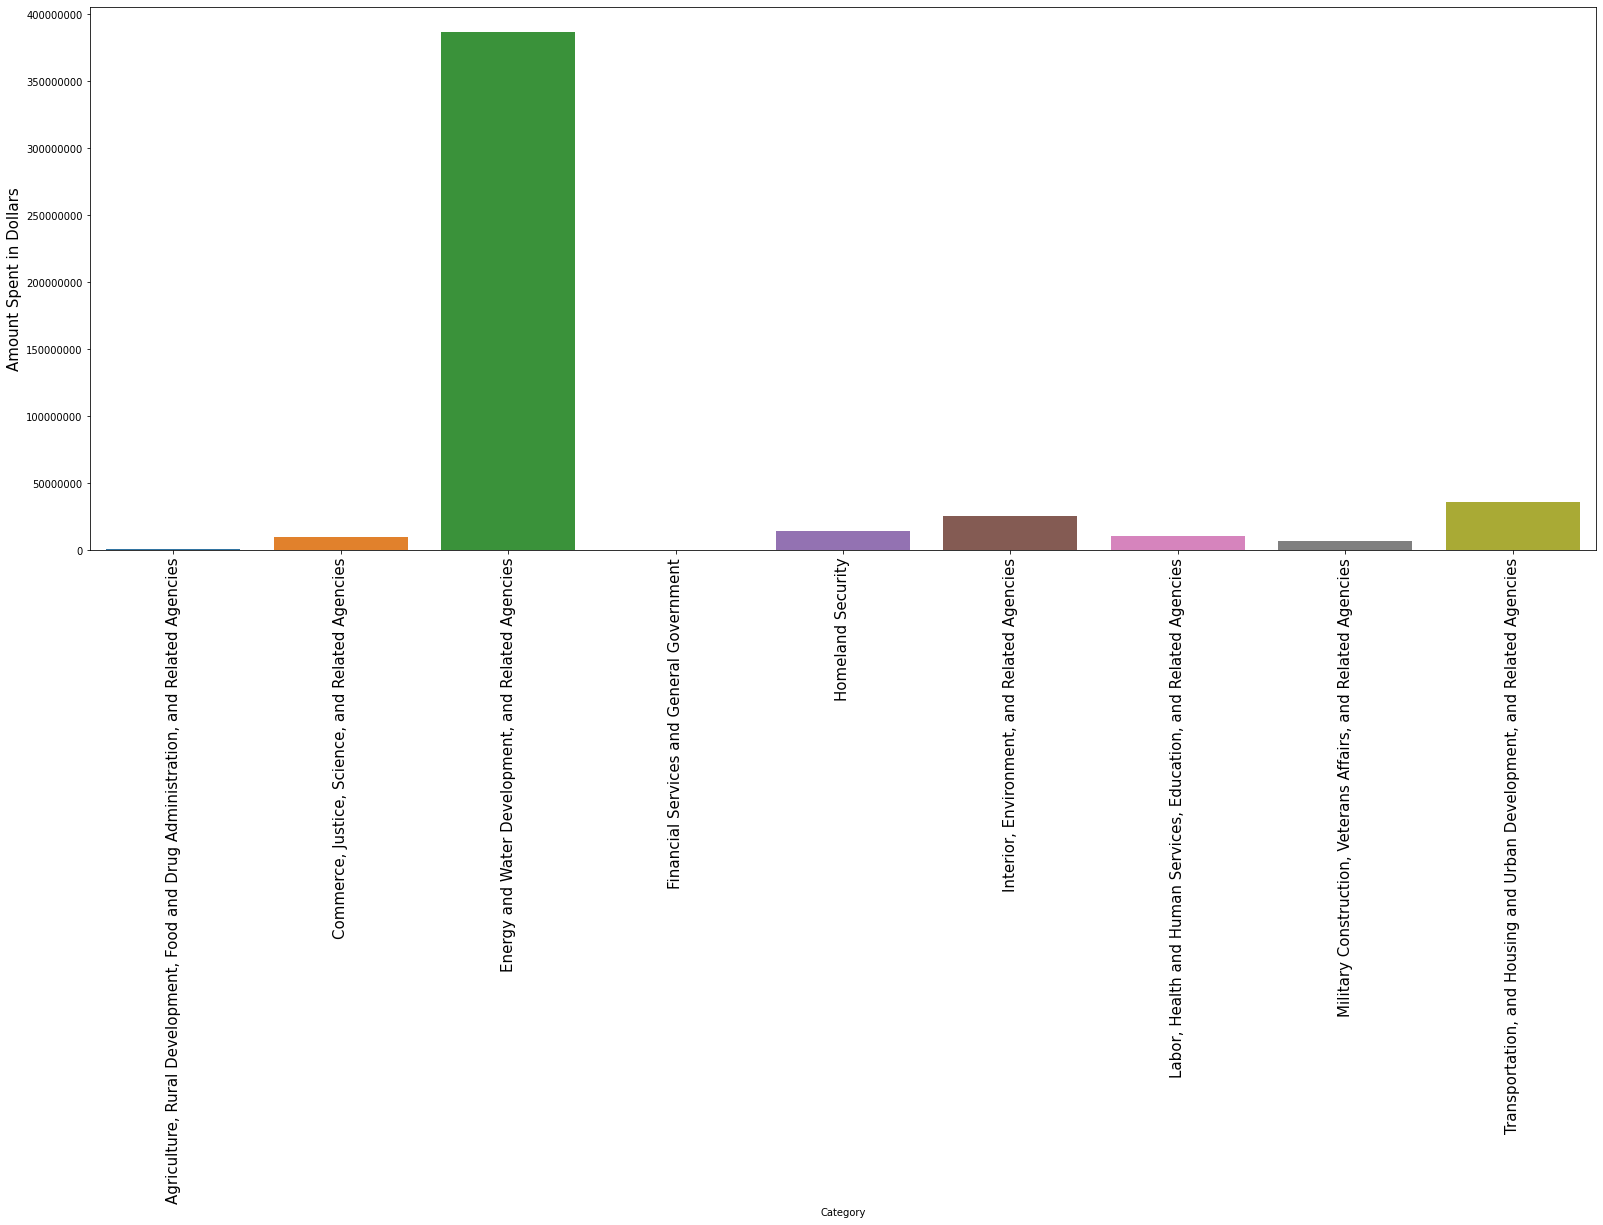

In [65]:
# Creates plots for FLorida

state_plt(1)

State: IA
Party Dataframe: Democrat


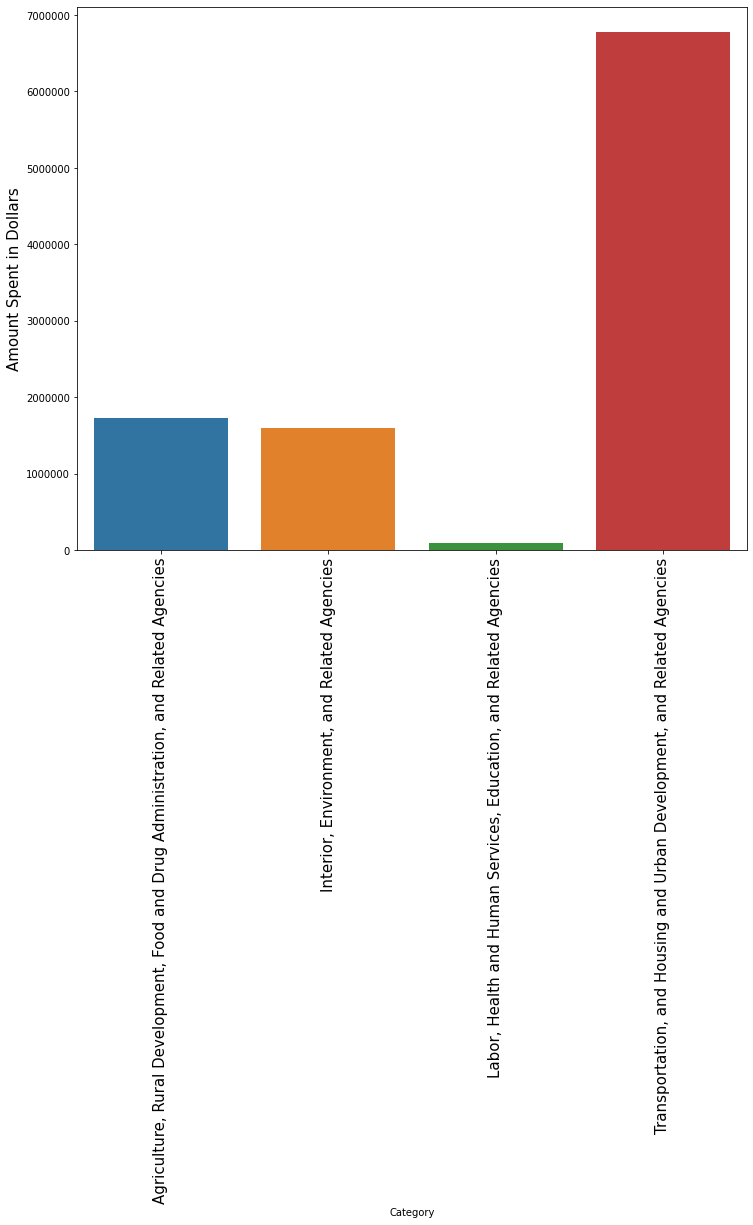

State: IA
Party Dataframe: Republican


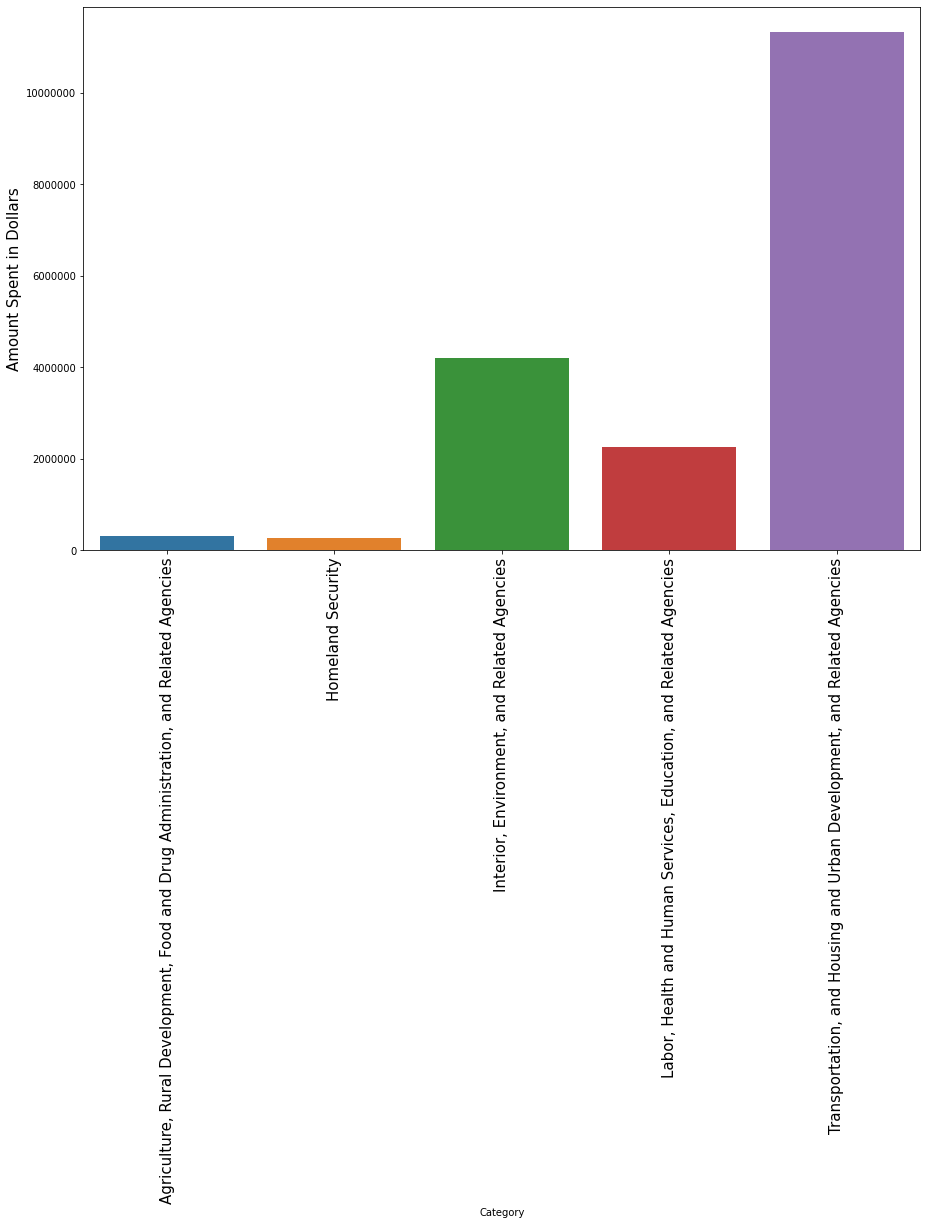

In [66]:
# Creates plots for Iowa
state_plt(2)

State: MI
Party Dataframe: Democrat


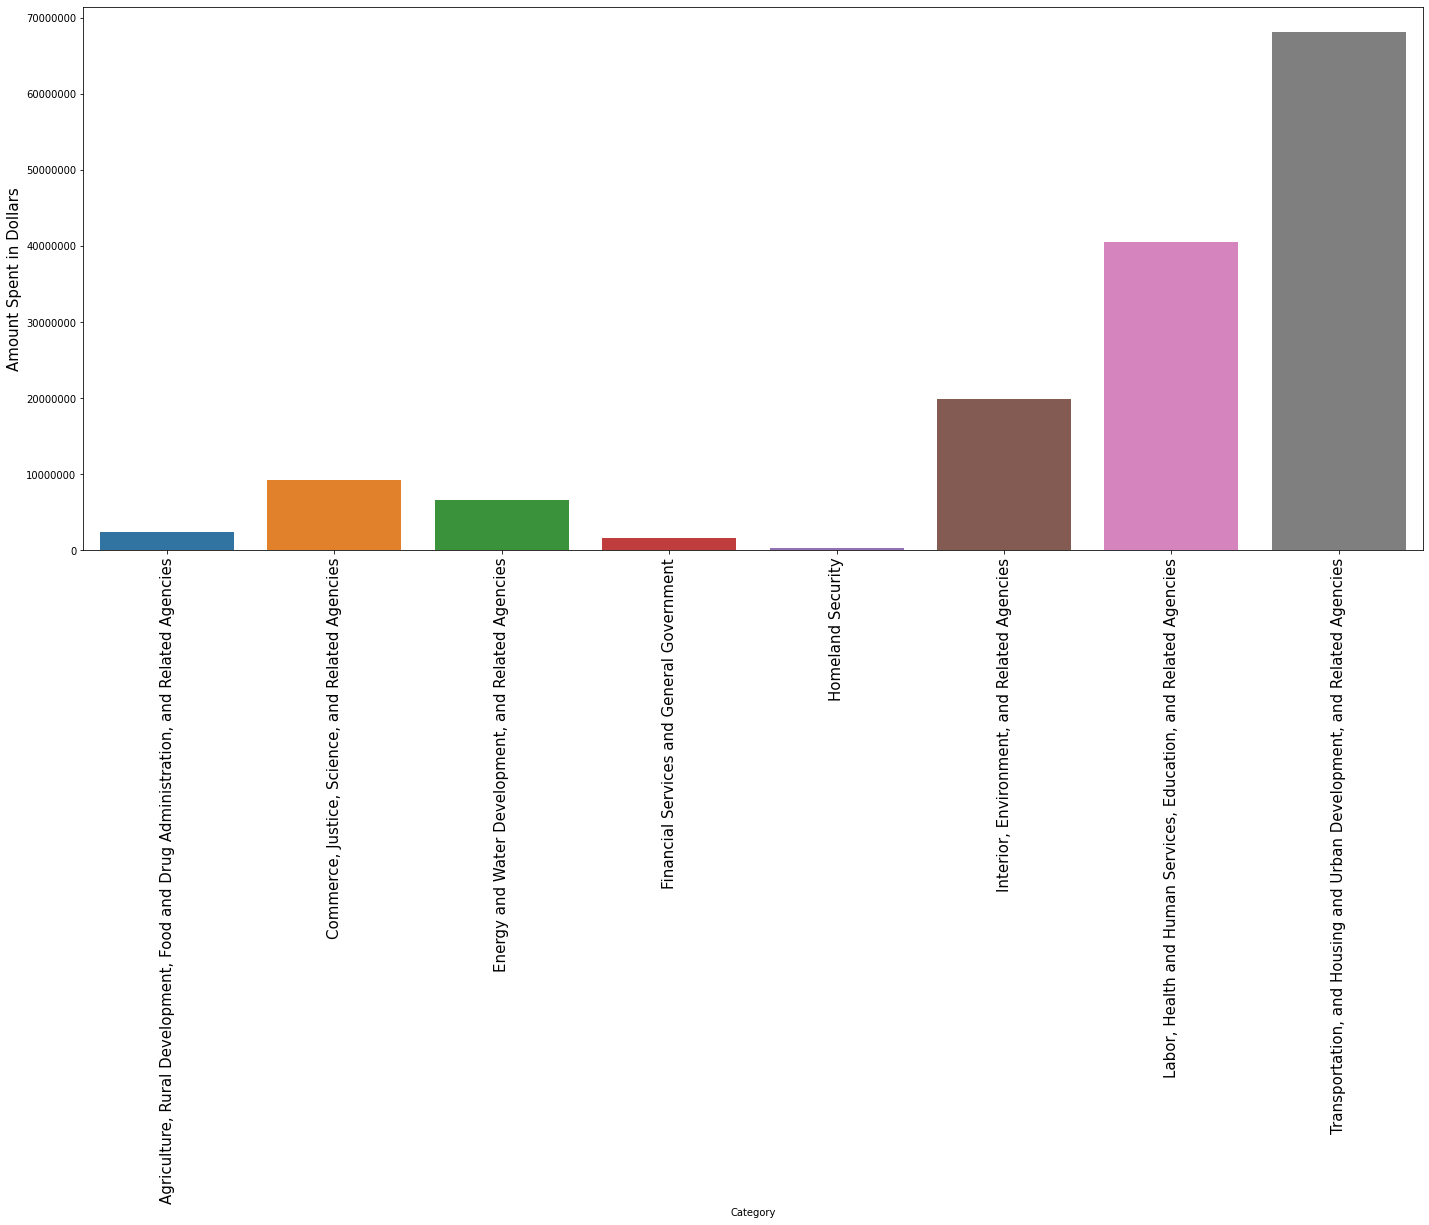

State: MI
Party Dataframe: Republican


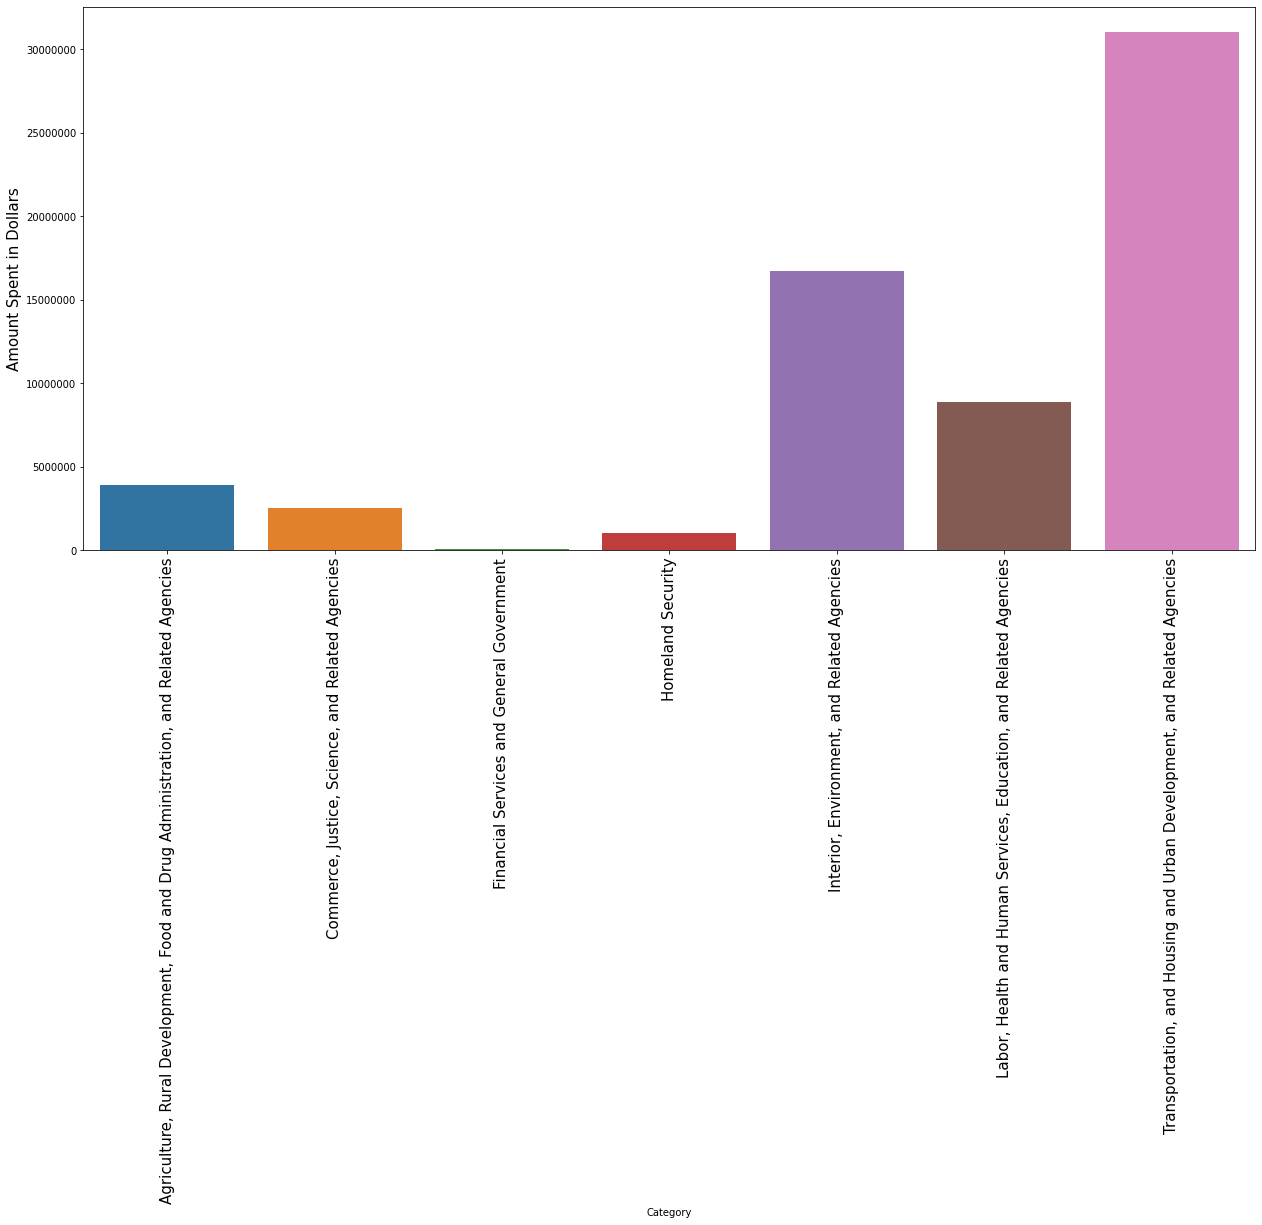

In [67]:
# Creates plots for Michigan
state_plt(3)

State: NC
Party Dataframe: Democrat


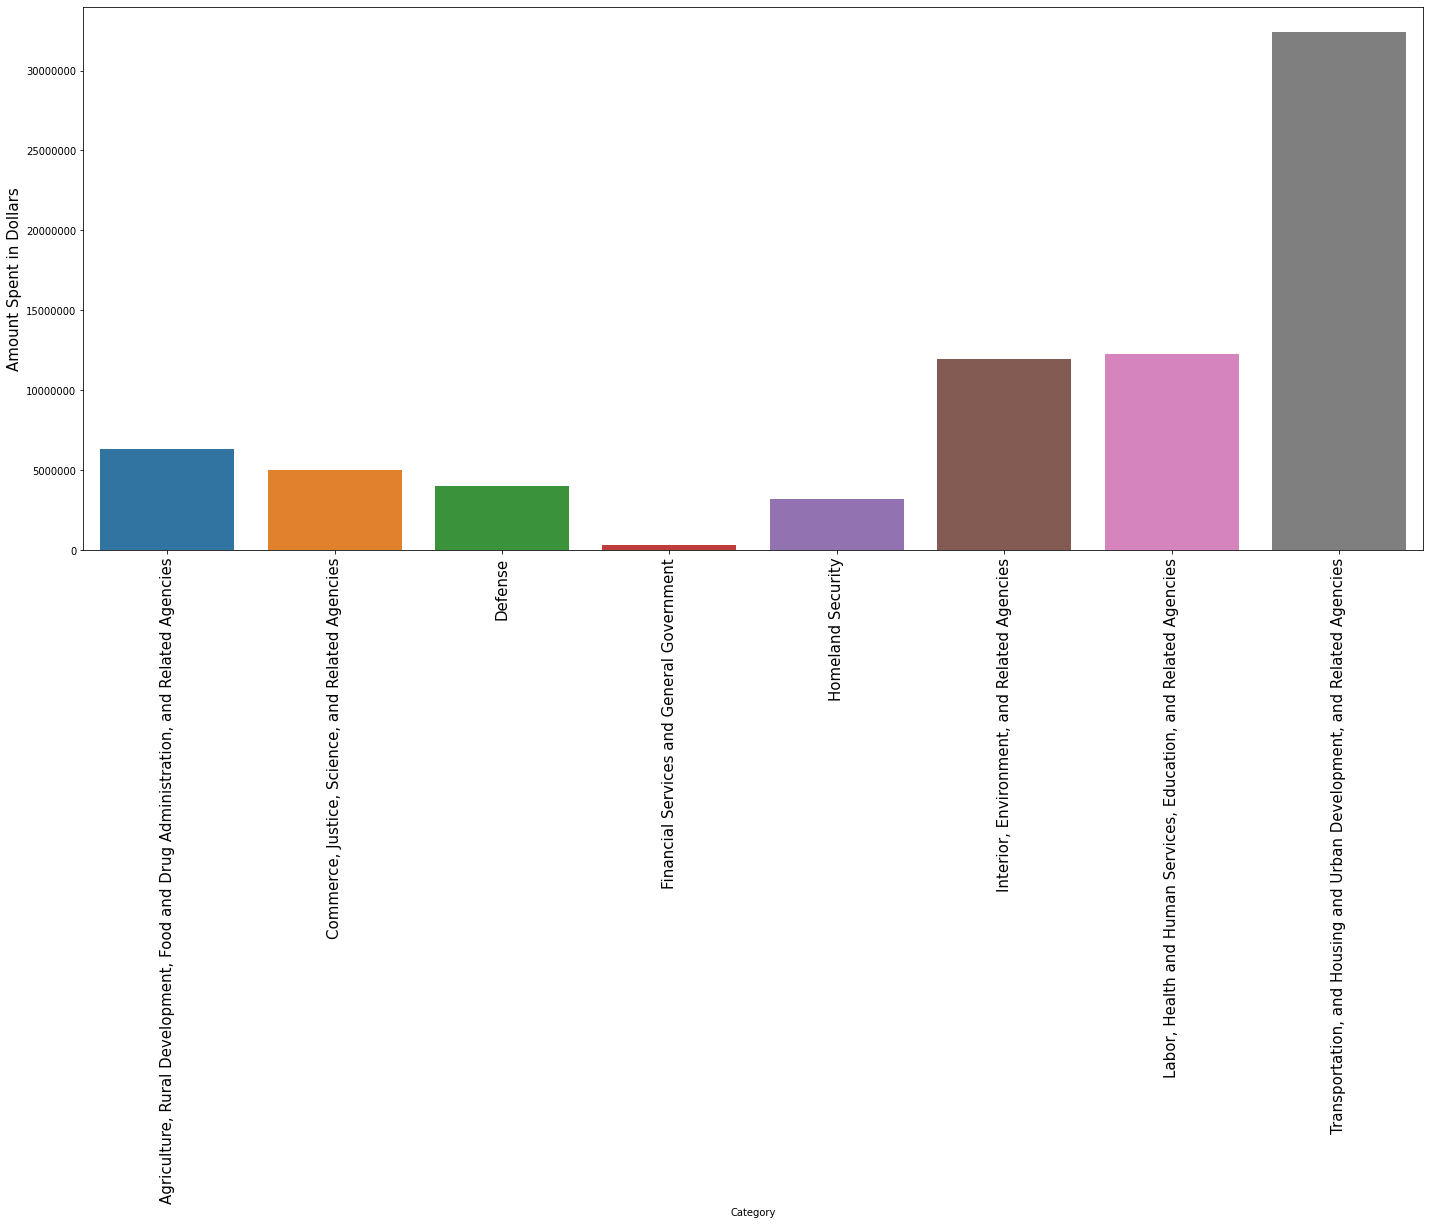

State: NC
Party Dataframe: Republican


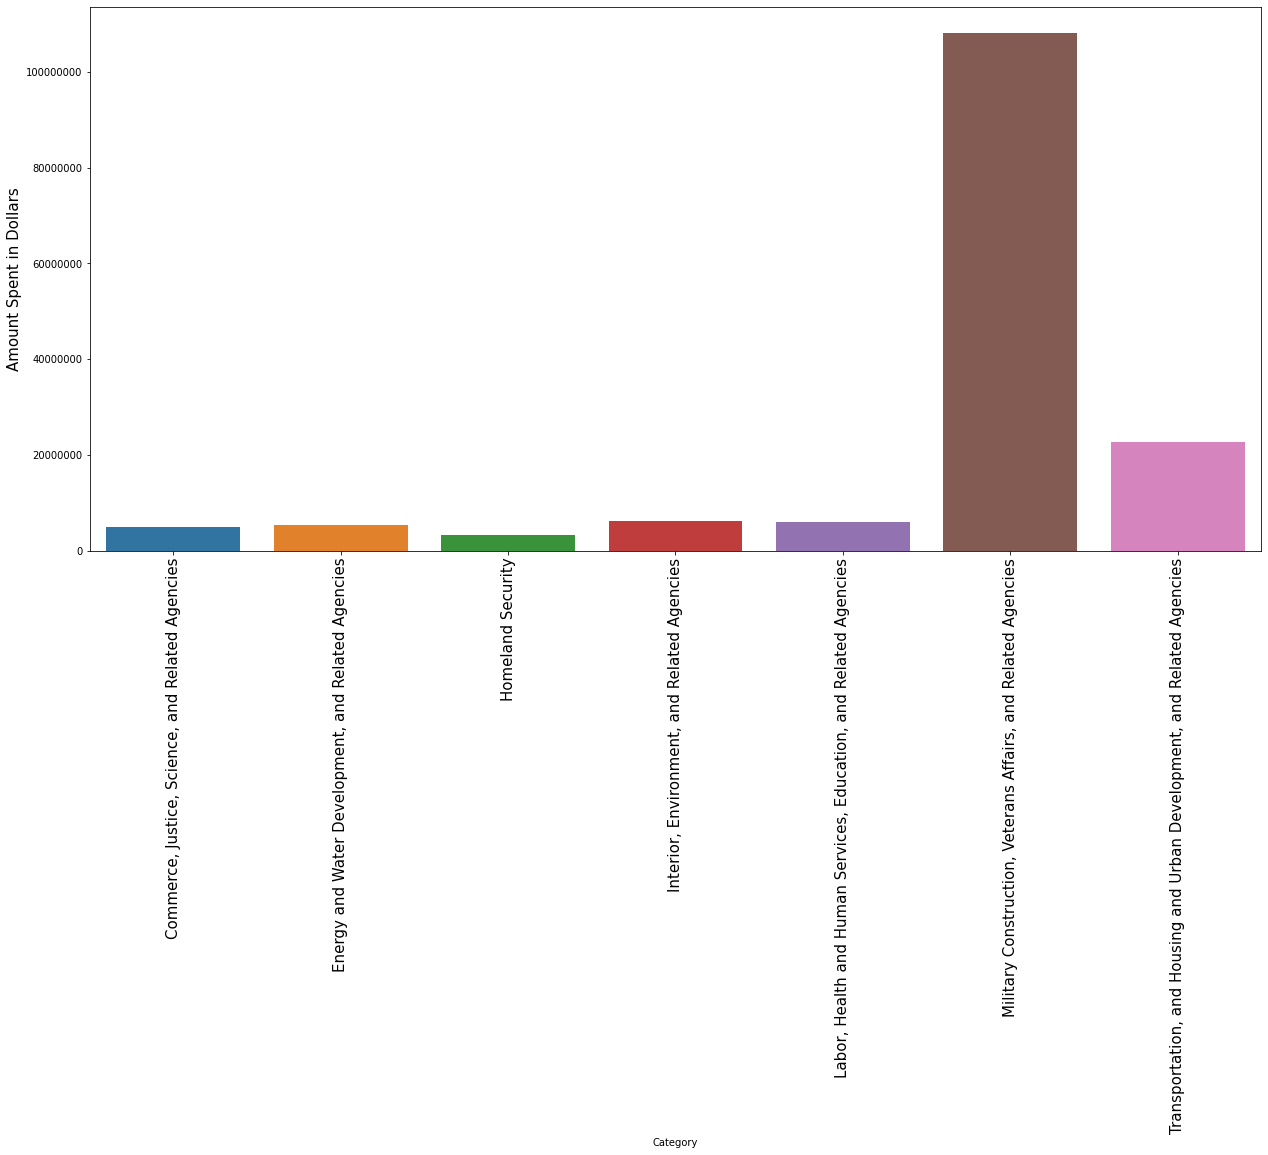

In [68]:
# Creates plots for North Carolina
state_plt(4)

State: NH
Party Dataframe: Democrat


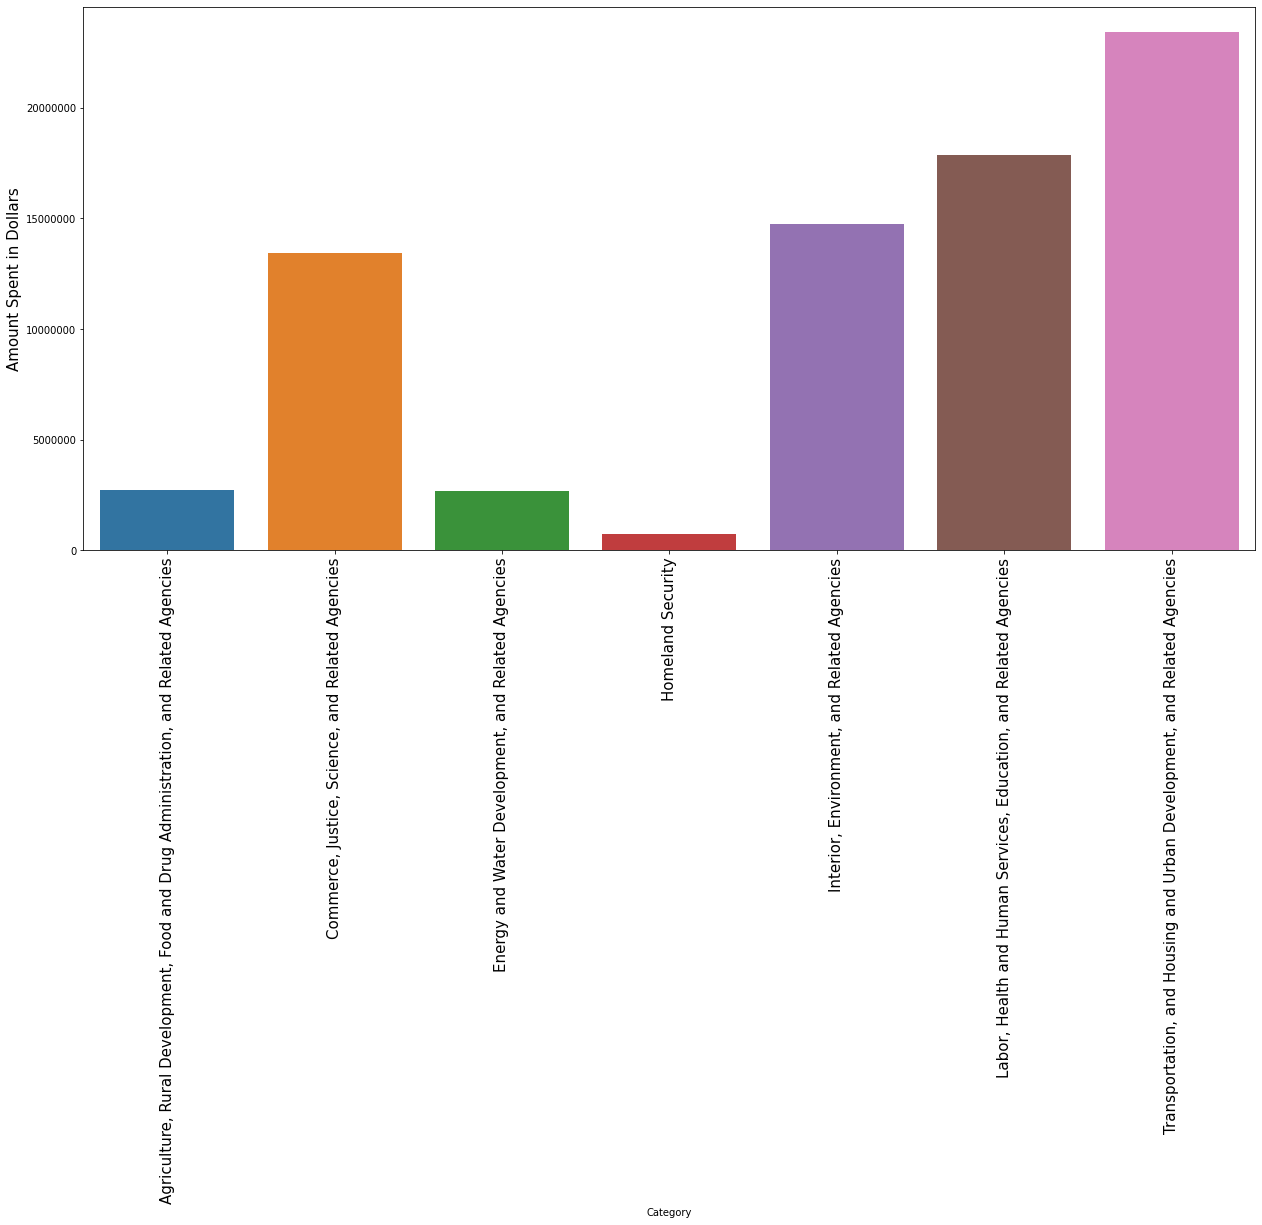

In [69]:
# Creates plots for New Hampshire
state_plt(5)

State: NV
Party Dataframe: Democrat


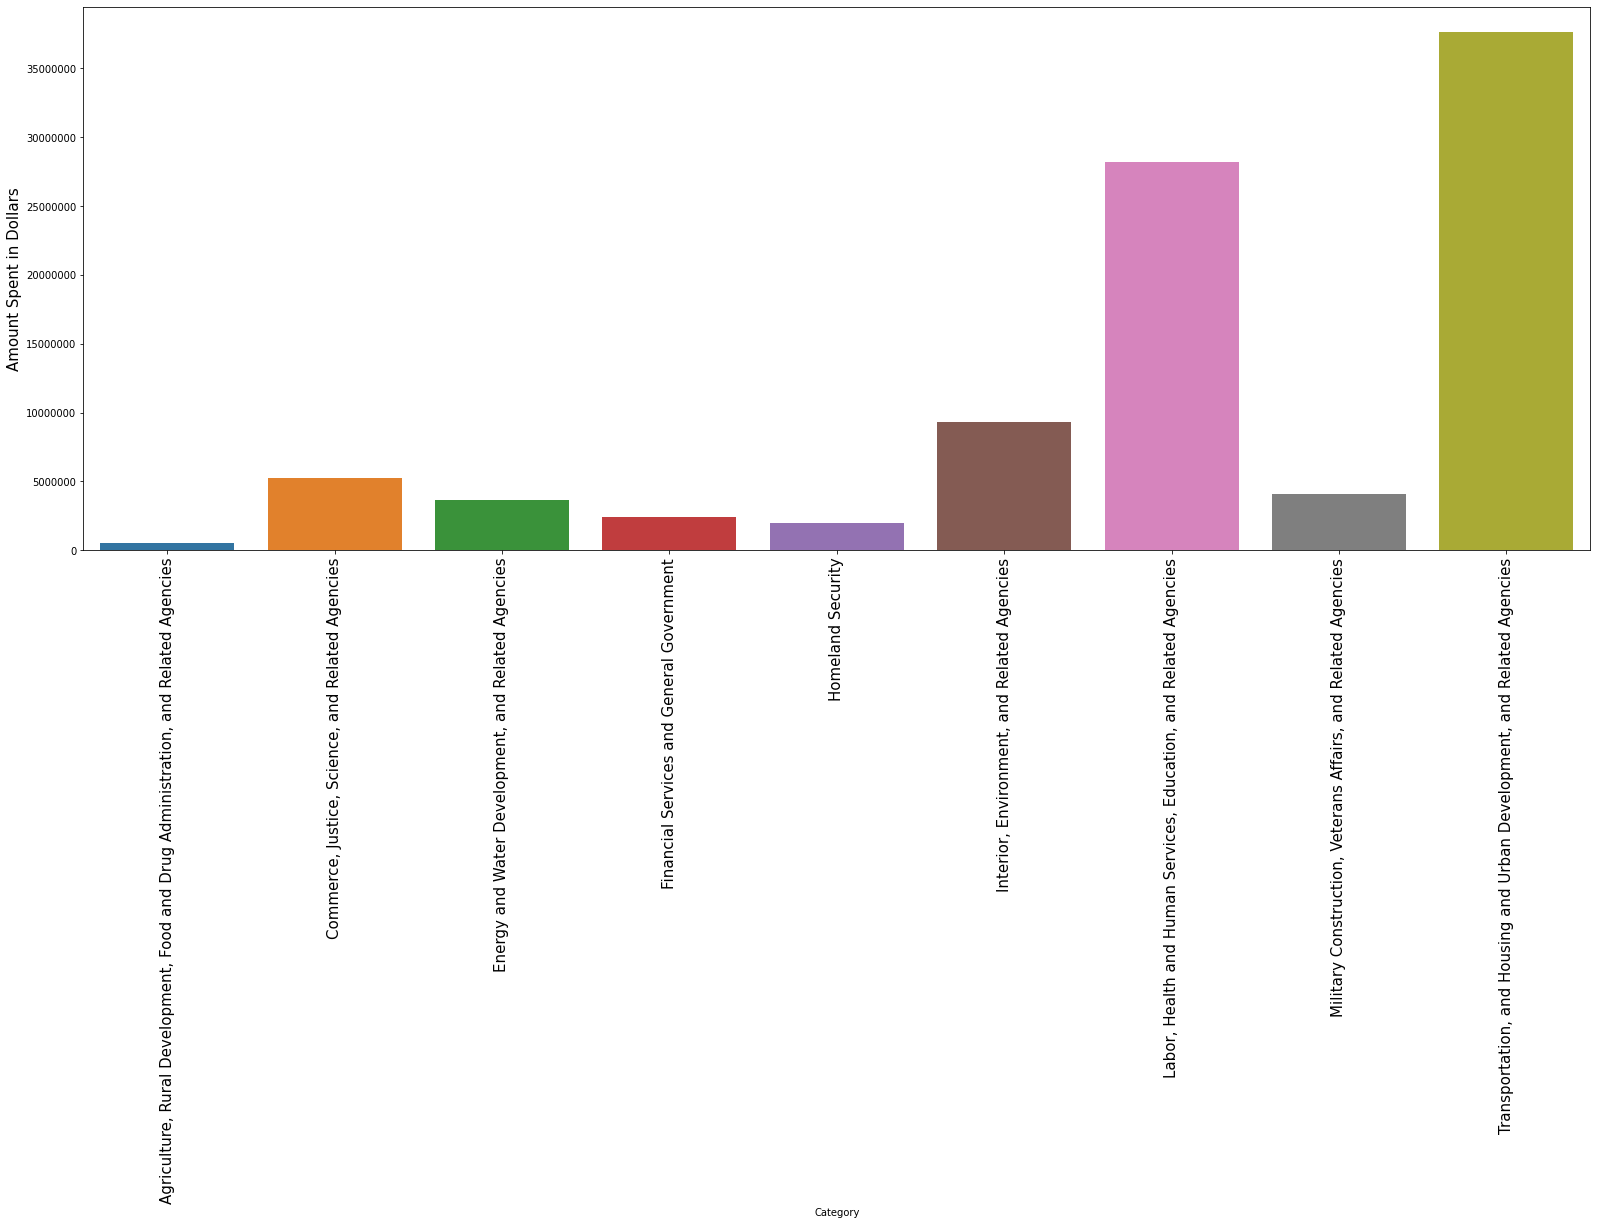

State: NV
Party Dataframe: Republican


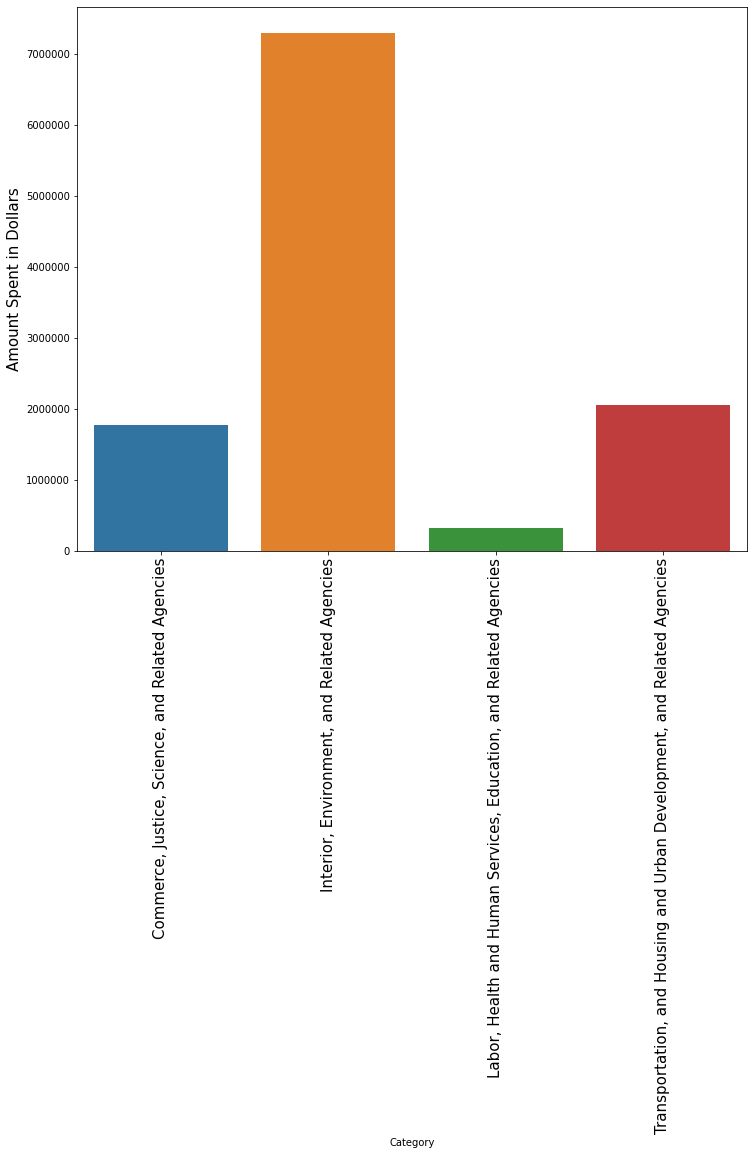

In [70]:
# Creates plots for Nevada
state_plt(6)

State: OH
Party Dataframe: Democrat


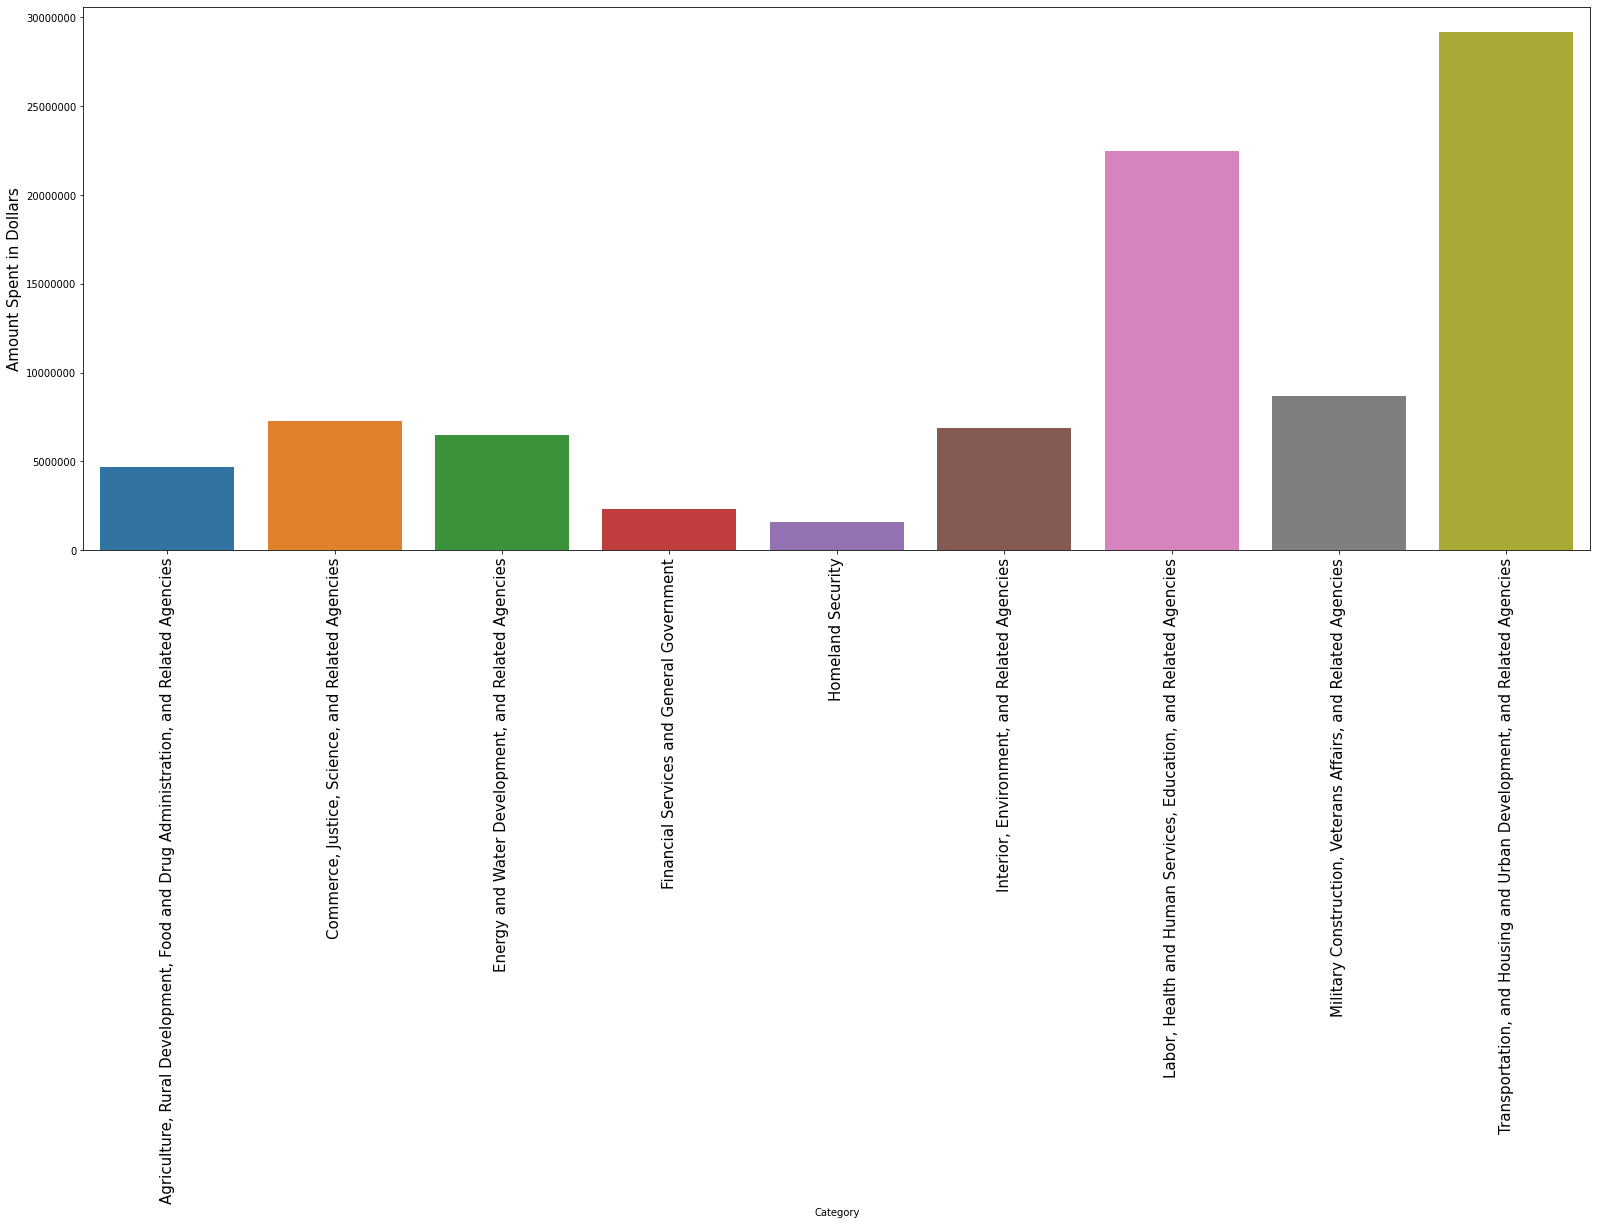

State: OH
Party Dataframe: Republican


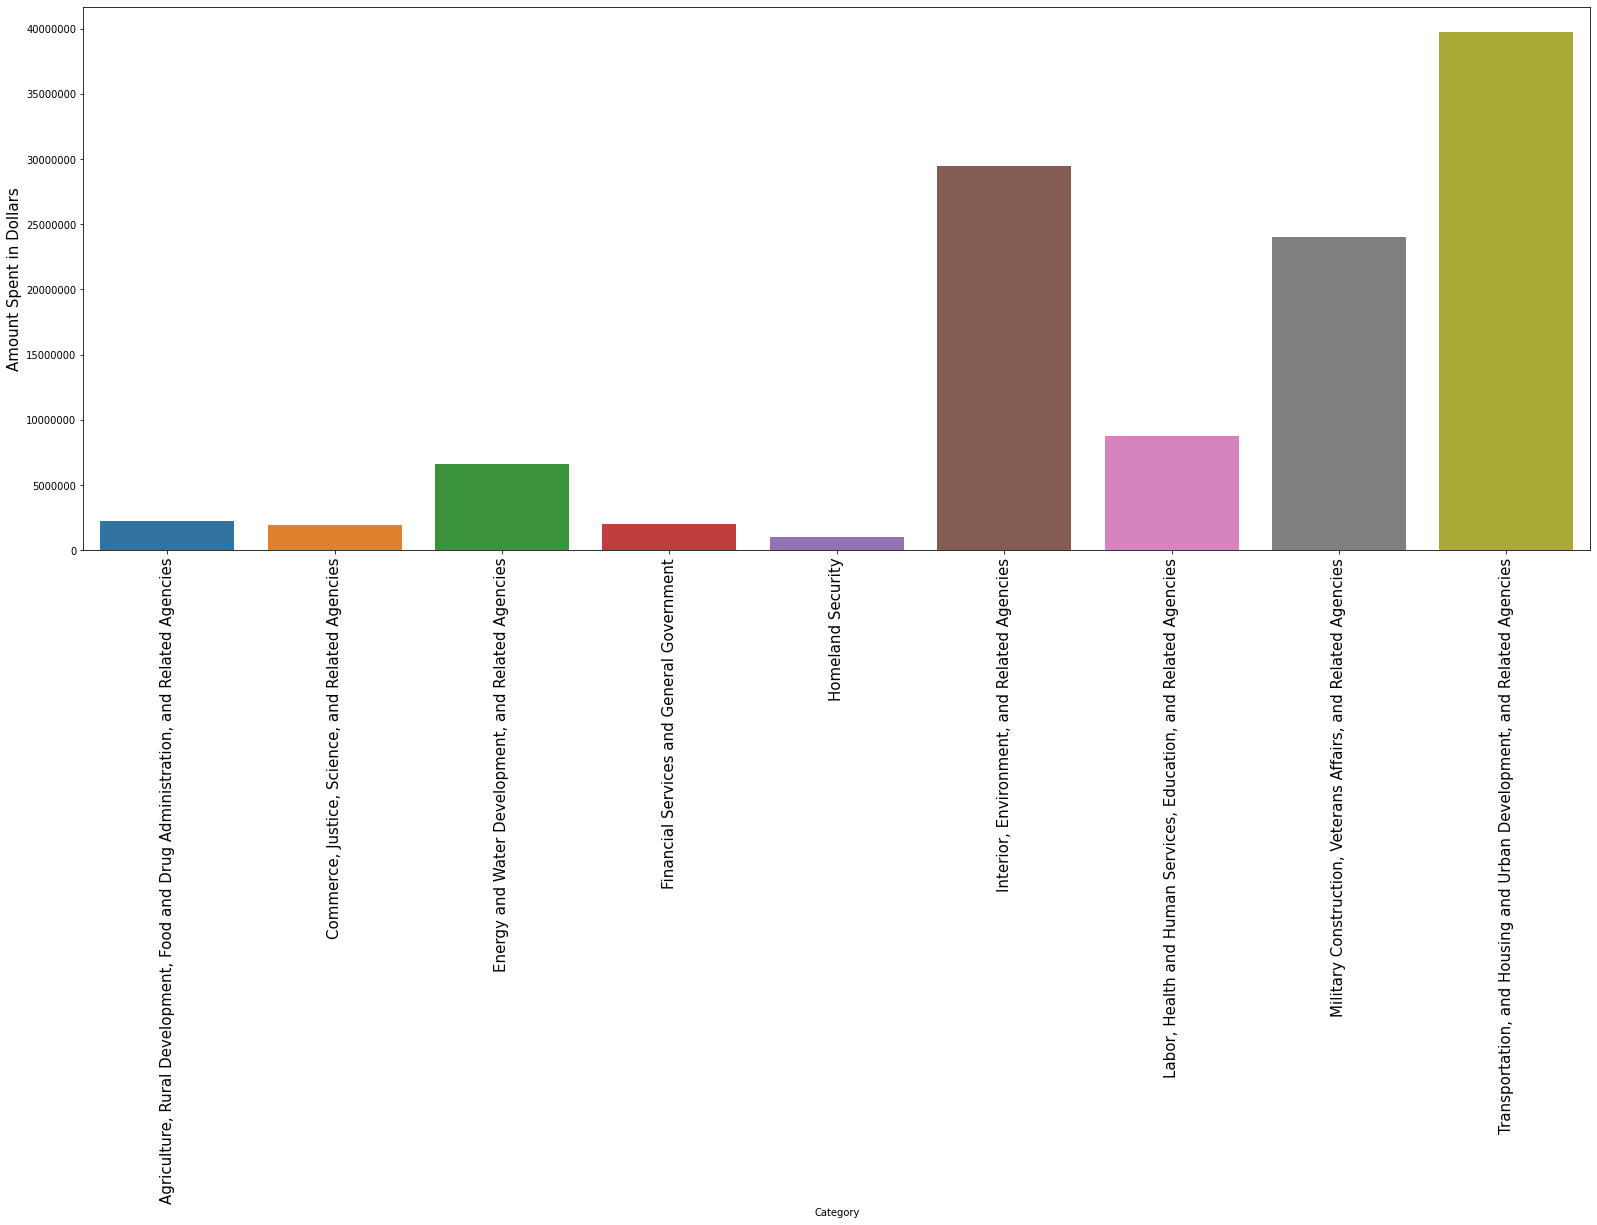

In [71]:
# Creates plots for Ohio
state_plt(7)

State: PA
Party Dataframe: Democrat


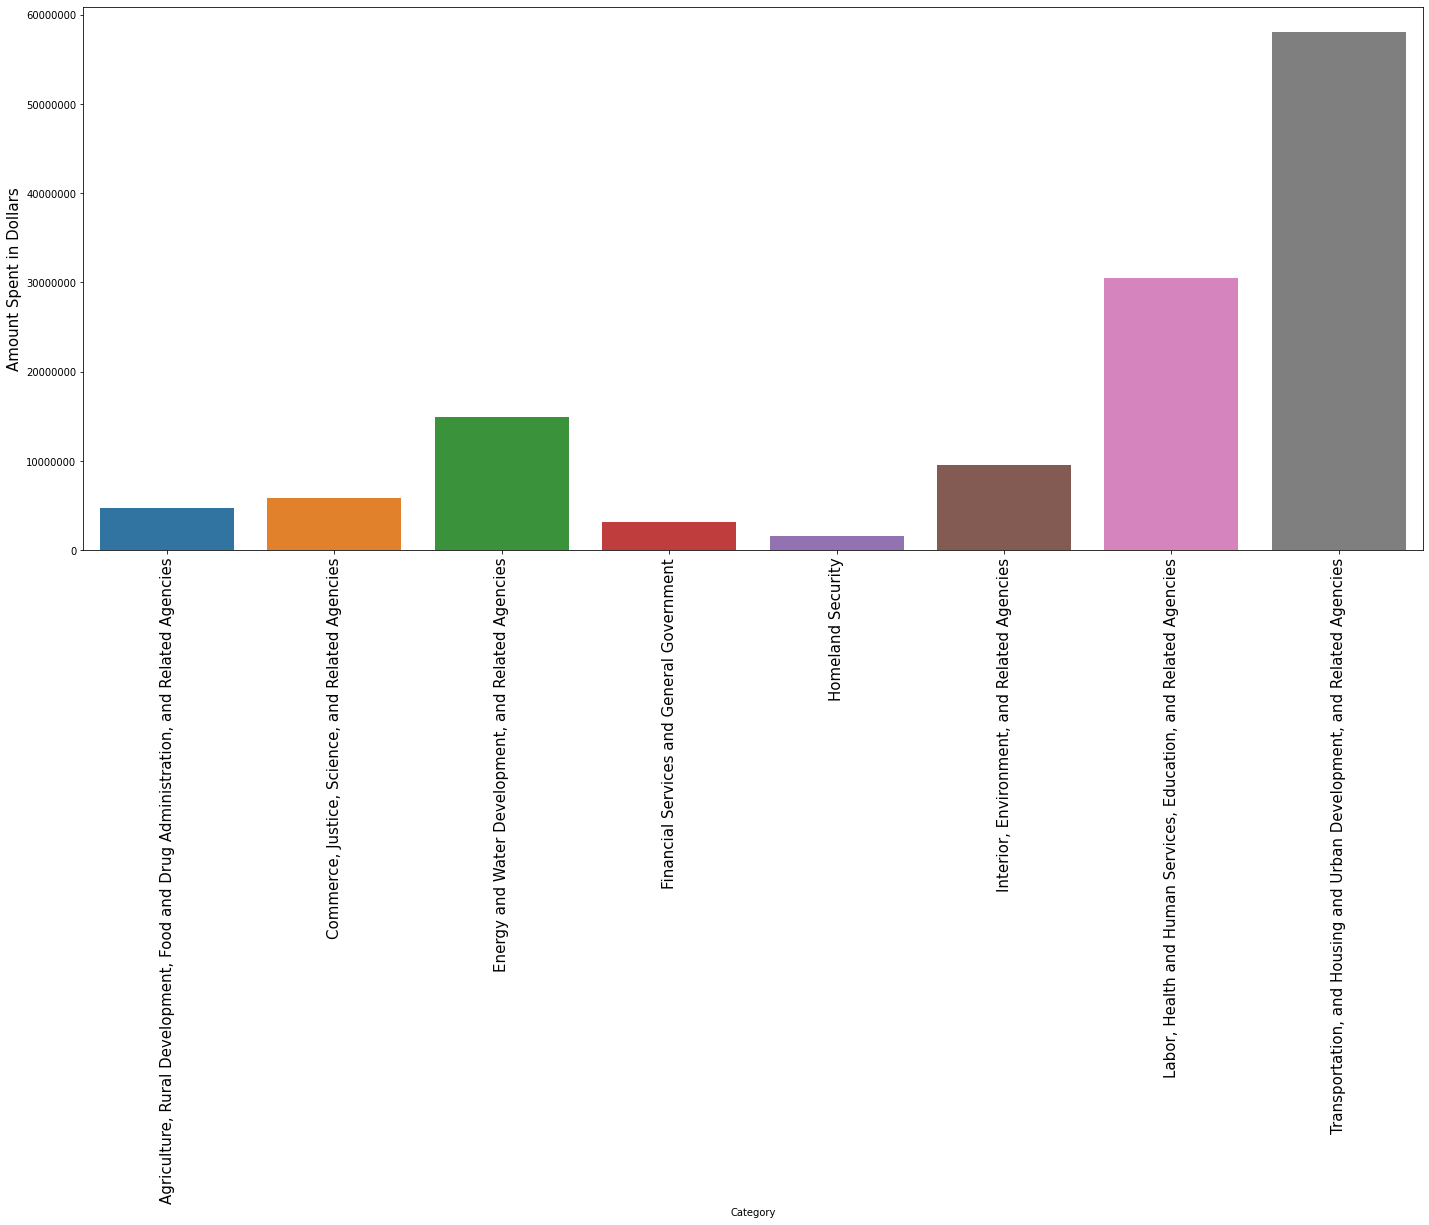

State: PA
Party Dataframe: Republican


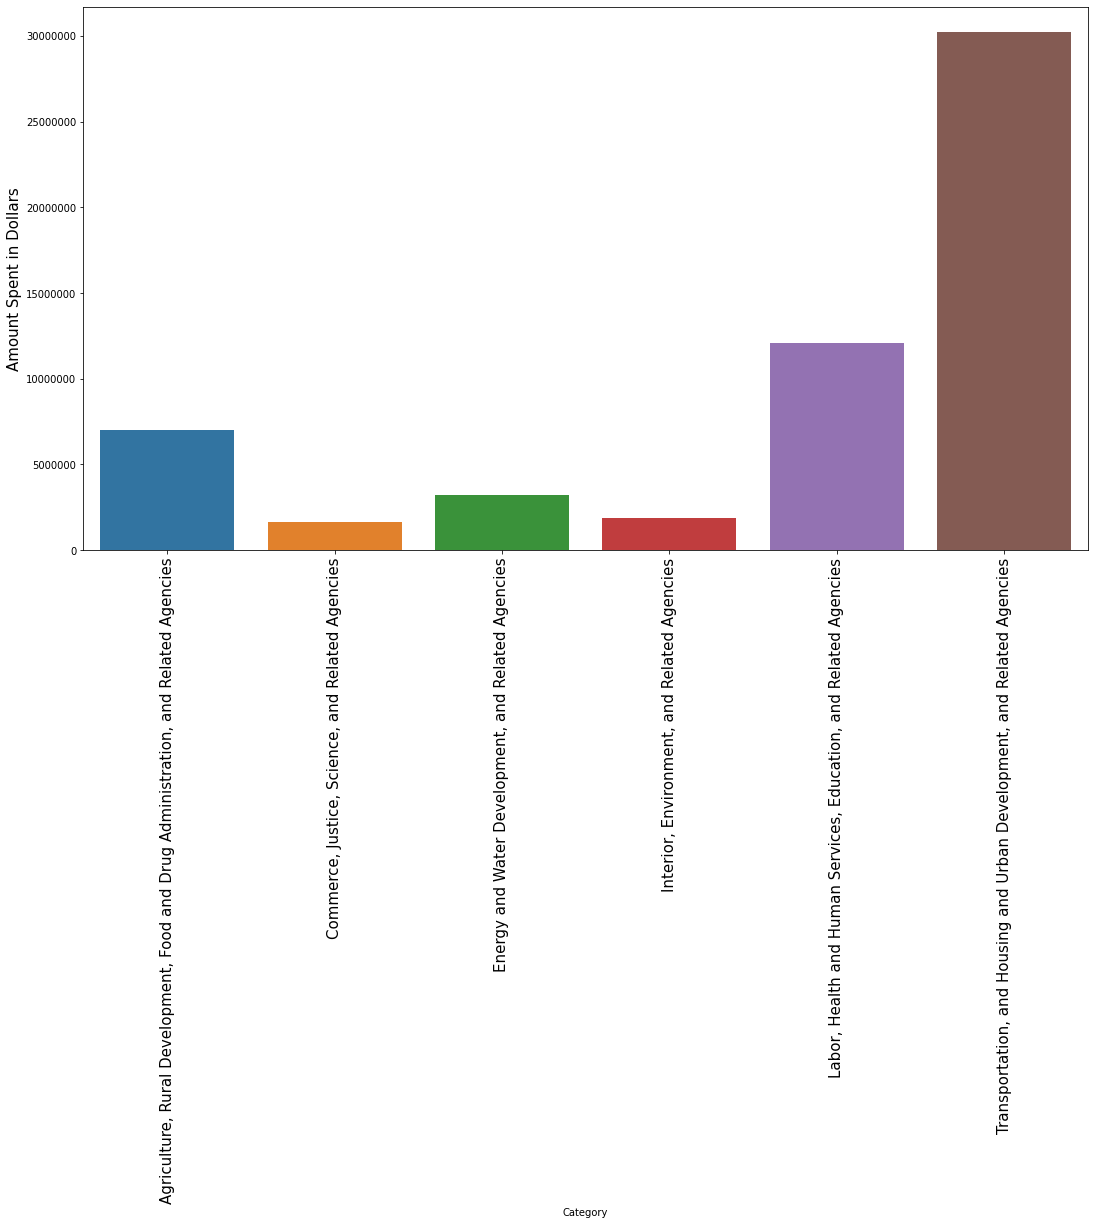

In [72]:
# Creates plots for Pennsylvania
state_plt(8)

State: VI
Party Dataframe: Democrat


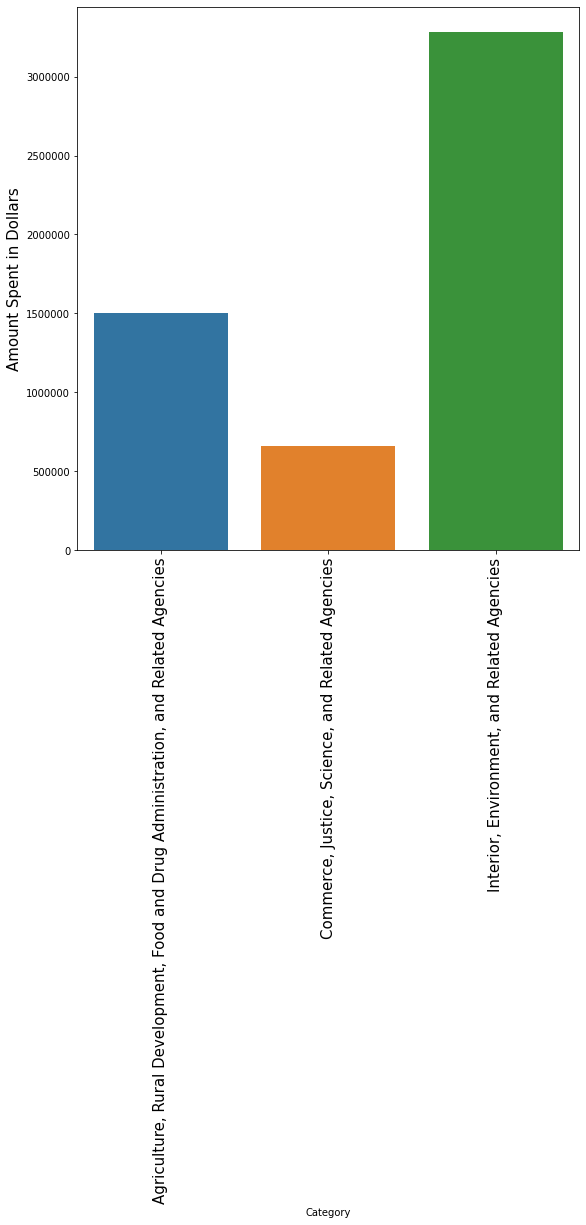

In [73]:
# Creates plots for Virginia
state_plt(9)

State: WI
Party Dataframe: Democrat


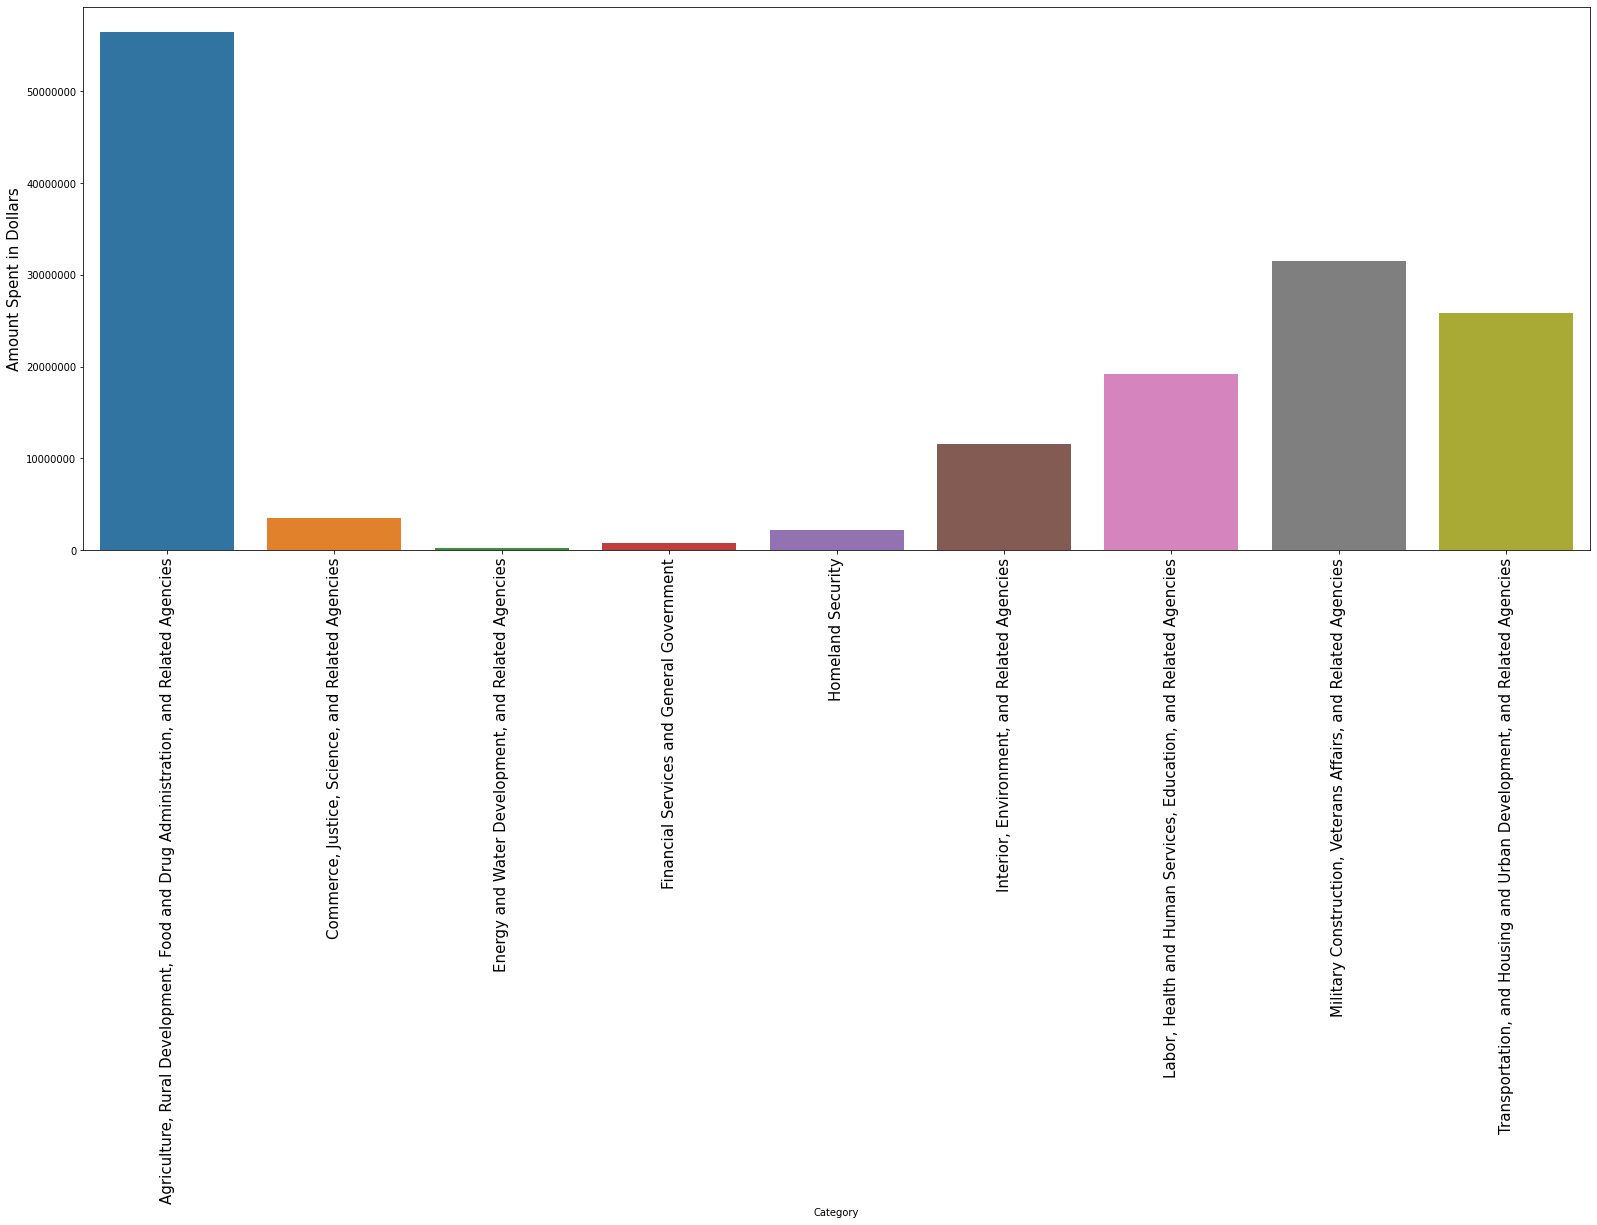

State: WI
Party Dataframe: Republican


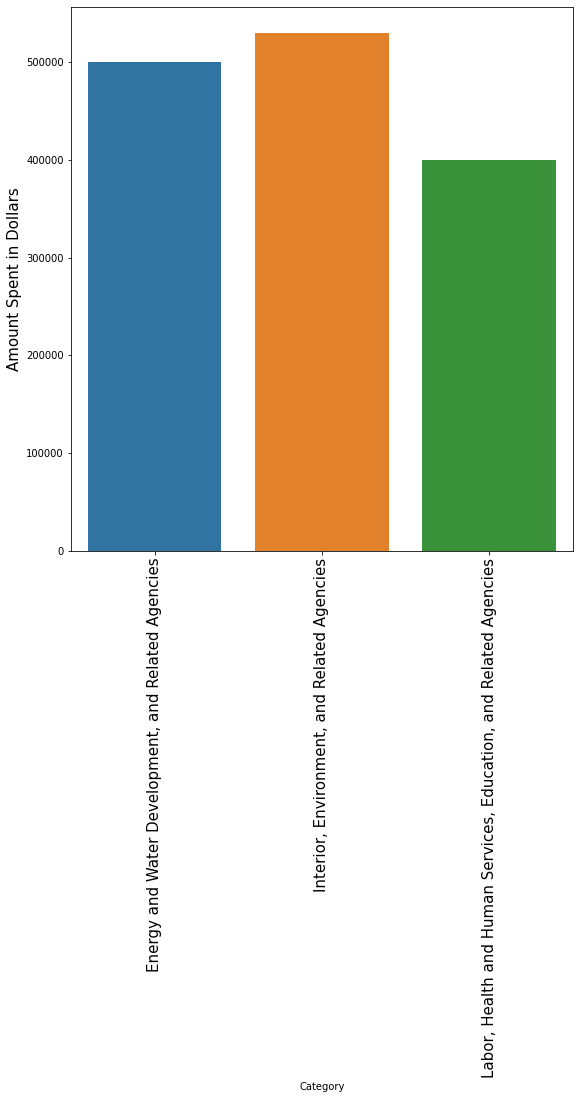

In [74]:
# Creates plots for Michigan
state_plt(10)